In [1]:


from bs4 import BeautifulSoup
import re
import time
import requests


def run(url):
    stockList=['bitcoin','stellar','ripple','ethereum','bitcoin-cash','zcoin','dropil','polymath-network','mithril','odem']  
    
    for stock in stockList:
        fw=open(stock+'.txt','w') # output file 
         
        html=None 
        
        startDate='20130101'
        endDate='20181119'
        if(stock == 'stellar'):
            startDate = '20130428'
        
        
        pageLink = url + stock + '/historical-data/?start='+startDate+'&end='+endDate
        print(pageLink)
        for i in range(1): # try 5 times
            try:
                #use the browser to access the url
                response=requests.get(pageLink,headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36', })
                html=response.content # get the html
                break # we got the file, break the loop
            except Exception as e:# browser.open() threw an exception, the attempt to get the response failed
                print ('failed attempt',i)
                time.sleep(2) # wait 2 secs
				
		
        if not html:continue # couldnt get the page, ignore
        
        soup = BeautifulSoup(html.decode('ascii', 'ignore'),'lxml') # parse the html 

        data_table=soup.find('div', {'class':'table-responsive'}) # get all the review divs
        table=data_table.find('table')
        table_body = table.find('tbody')
        all_rows = table_body.findAll('tr')
    
        fw.write('Date\tOpen*\tHigh\tLow\tClose**\tVolume\tMarket Cap\n')
        for row in all_rows:
            columns = row.findAll('td')
            file_row=''
            index = 0
            for column in columns:
                if(index == 0):
                    file_row = column.text
                    index = 1
                else:
                    file_row = file_row + '\t' + column.text
            fw.write(file_row+'\n') # write to file  

        fw.close()


if __name__=='__main__':
    url='https://coinmarketcap.com/currencies/'
    run(url)






https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130101&end=20181119
https://coinmarketcap.com/currencies/stellar/historical-data/?start=20130428&end=20181119
https://coinmarketcap.com/currencies/ripple/historical-data/?start=20130101&end=20181119
https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130101&end=20181119
https://coinmarketcap.com/currencies/bitcoin-cash/historical-data/?start=20130101&end=20181119
https://coinmarketcap.com/currencies/zcoin/historical-data/?start=20130101&end=20181119
https://coinmarketcap.com/currencies/dropil/historical-data/?start=20130101&end=20181119
https://coinmarketcap.com/currencies/polymath-network/historical-data/?start=20130101&end=20181119
https://coinmarketcap.com/currencies/mithril/historical-data/?start=20130101&end=20181119
https://coinmarketcap.com/currencies/odem/historical-data/?start=20130101&end=20181119


In [1]:
import pandas as pd

stockList=['bitcoin','stellar','ripple','ethereum','bitcoin-cash','zcoin',
            'dropil','polymath-network','mithril','odem']
bitcoin=pd.read_csv("bitcoin.txt","r",delimiter="\t")
stellar=pd.read_csv("stellar.txt","r",delimiter="\t")
ripple=pd.read_csv("ripple.txt","r",delimiter="\t")
ethereum=pd.read_csv("ethereum.txt","r",delimiter="\t")
bitcoin_cash=pd.read_csv("bitcoin-cash.txt","r",delimiter="\t")
zcoin=pd.read_csv("zcoin.txt","r",delimiter="\t")
dropil=pd.read_csv("dropil.txt","r",delimiter="\t")
polymath_network=pd.read_csv("polymath-network.txt","r",delimiter="\t")
mithril=pd.read_csv("mithril.txt","r",delimiter="\t")
odem=pd.read_csv("odem.txt","r",delimiter="\t")











In [6]:
bitcoin.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Nov 19, 2018",5620.78,5620.78,4842.91,4871.49,"7,039,560,000","84,688,539,692"
1,"Nov 18, 2018",5559.74,5653.61,5559.74,5623.54,"4,159,680,000","97,753,714,643"
2,"Nov 17, 2018",5578.58,5578.58,5519.56,5554.33,"4,303,150,000","96,542,098,114"
3,"Nov 16, 2018",5645.32,5657.02,5498.94,5575.55,"5,279,320,000","96,900,828,780"
4,"Nov 15, 2018",5736.15,5774.82,5358.38,5648.03,"7,032,140,000","98,151,606,541"


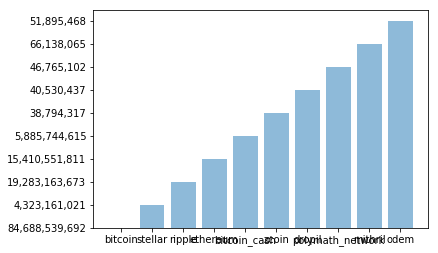

In [6]:
###This part is not working, still need to fix data type issue. 

import numpy as np
import matplotlib.pyplot as plt


stockList=['bitcoin','stellar','ripple','ethereum','bitcoin_cash','zcoin',
            'dropil','polymath_network','mithril','odem']

Market_cap=[]
for i in range(0,len(stockList)):
    
    temp=globals()['%s'%stockList[i]]
    temp2=temp.loc[0,"Market Cap"]
    Market_cap.append(temp2)

Value=(('ethereum', 15410551811),
       ('ripple', 19283163673),
       ('zcoin', 38794317),
       ('stellar', 4323161021),
       ('dropil', 40530437),
       ('polymath_network', 46765102),
       ('bitcoin_cash', 5885744615),
       ('odem', 51895468),
       ('mithril', 66138065),
       ('bitcoin', 84688539692))
   

    
y_pos = np.arange(len(Market_cap))
plt.bar(y_pos,Market_cap,alpha=0.5)
plt.xticks(y_pos,stockList)
plt.show()